In [51]:
# !pip install pandas
import pandas as pd
import os
import ast
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


In [52]:
def process_string(input_string):
    reduced_spaces = re.sub(r'\s+', ' ', input_string)
    trimmed = re.sub(r'^[^\w.-]+', '', reduced_spaces)
    trimmed = re.sub(r'[^\w.-]+$', '', trimmed)
    result = re.sub(r' ', ',', trimmed)
    
    return result

def extract_pose_string(text):
    return ast.literal_eval(f"[{process_string(text)}]")


def draw_direction_annotation(position, yaw, ax, scale=0.4, is_grad=True, is_goal=False):
    x, y = position
    # Convert yaw from degrees to radians
    if not is_grad:
        yaw_rad = np.deg2rad(yaw)
    else:
        yaw_rad = yaw

    
    # Calculate the direction vector based on the yaw angle
    dx = np.cos(yaw_rad)
    dy = np.sin(yaw_rad)
    
    # Calculate the perpendicular direction vector
    perp_dx = -dy
    perp_dy = dx
    
    # Scale the perpendicular vector for the short line
    line_length = 0.2
    perp_dx *= line_length
    perp_dy *= line_length
    
    # Create the plot
    ax.plot(x, y, 'ro')  # Plot the position as a red dot
    
    # Add the annotation arrow
    ax.annotate('', xy=(x + dx*scale, y + dy*scale), xytext=(x, y),
                 arrowprops=dict(facecolor='green' if is_goal else 'blue', 
                                 shrink=0.05, 
                                 width=0.5, 
                                 headwidth=5))
    
    # Draw the short perpendicular line
    ax.plot([x - perp_dx, x + perp_dx], [y - perp_dy, y + perp_dy], 'g-')

In [53]:
file_dir = "./simdata/multi_pose/Stanley_CTRL/"

def get_df_from_lines(data, parameters):
    headers = data[0].split(",")
    data_dict = {}
    for line in data[1:]:
        line_info = line.split(",")
        for idx, header in enumerate(headers):
            if header not in data_dict:
                data_dict[header] = [float(line_info[idx])]
            else:
                data_dict[header].append(float(line_info[idx]))

    df = pd.DataFrame(data_dict)
    parameters_dict = {line.split(",")[0]: "".join(line.split(",")[1:]) for line in parameters}
    df["parameters"] = str(parameters_dict)
    df["Stanley_traj"] = parameters_dict["Stanley_traj"]
    df["Stanley_L"] = float(parameters_dict["Stanley_L"])
    df["Stanley_strategy"] = parameters_dict["Stanley_strategy"]
    df["Stanley_k"] = float(parameters_dict["Stanley_k"])

    return df


df_list = []
for root, dirs, files in os.walk(file_dir):
    for fn in files:
        if not fn.endswith(".csv"):
            continue
        file_path = os.path.join(root, fn)

        with open(file_path) as f:
            data = f.read().splitlines()

        parameters = []
        for from_line, line in enumerate(data):
            if line.startswith("t [s]"):
                break

            parameters.append(line)
        df = get_df_from_lines(data[from_line:], parameters)
        df_list.append(df)

concat_df = pd.concat(df_list)

In [54]:
# df_group_info = concat_df.groupby(['N_kappa', 'state_init']).size()
# df_group_info
concat_df["Stanley_traj"].unique()

concat_df

,t [s],x [m],y [m],alpha [rad],run_obj,accum_obj,v [m/s],omega [rad/s],parameters,Stanley_traj,Stanley_L,Stanley_strategy,Stanley_k
0,0.000100,-1.000000,-1.000000,1.570000,224.649000,22.464900,-0.22,-0.284000,"{'System': 'Sys3WRobotStanley', 'Controller': ...",inf,0.2,tempo,1.0
1,0.001100,-1.000000,-1.000200,1.570292,224.698183,44.934718,-0.22,-0.284000,"{'System': 'Sys3WRobotStanley', 'Controller': ...",inf,0.2,tempo,1.0
2,0.008955,-0.999999,-1.001928,1.572814,225.123208,67.447039,-0.22,-0.284000,"{'System': 'Sys3WRobotStanley', 'Controller': ...",inf,0.2,tempo,1.0
3,0.058955,-0.999888,-1.012927,1.588868,227.824892,90.229528,-0.22,-0.284000,"{'System': 'Sys3WRobotStanley', 'Controller': ...",inf,0.2,tempo,1.0
4,0.108955,-0.999601,-1.023924,1.604922,230.519976,113.281526,0.50,0.327509,"{'System': 'Sys3WRobotStanley', 'Controller': ...",inf,0.2,tempo,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,29.808955,-4.892276,0.536516,-3.099093,2518.265016,118600.021686,0.50,-2.459498,"{'System': 'Sys3WRobotStanley', 'Controller': ...",inf,0.2,simple,0.1
599,29.858955,-4.917157,0.534189,-2.997577,2536.233262,118853.645013,0.50,3.625844,"{'System': 'Sys3WRobotStanley', 'Controller': ...",inf,0.2,simple,0.1
600,29.908955,-4.942185,0.530682,-3.023665,2562.106973,119109.855710,0.50,2.840000,"{'System': 'Sys3WRobotStanley', 'Controller': ...",inf,0.2,simple,0.1
601,29.958955,-4.967062,0.528224,-3.062550,2588.864856,119368.742196,0.50,3.777618,"{'System': 'Sys3WRobotStanley', 'Controller': ...",inf,0.2,simple,0.1


In [55]:
chosen_trajectory = concat_df["Stanley_traj"].unique()[1]
sub_df_1 = concat_df[concat_df["Stanley_traj"] == chosen_trajectory]
sub_df_1

,t [s],x [m],y [m],alpha [rad],run_obj,accum_obj,v [m/s],omega [rad/s],parameters,Stanley_traj,Stanley_L,Stanley_strategy,Stanley_k
0,0.000100,-1.000000,-1.000000,1.570000,224.649000,22.464900,-0.22,-0.284000,"{'System': 'Sys3WRobotStanley', 'Controller': ...",sine,0.2,tempo,0.1
1,0.001100,-1.000000,-1.000200,1.570292,224.698183,44.934718,-0.22,-0.284000,"{'System': 'Sys3WRobotStanley', 'Controller': ...",sine,0.2,tempo,0.1
2,0.008955,-0.999999,-1.001928,1.572814,225.123208,67.447039,-0.22,-0.284000,"{'System': 'Sys3WRobotStanley', 'Controller': ...",sine,0.2,tempo,0.1
3,0.058955,-0.999888,-1.012927,1.588868,227.824892,90.229528,-0.22,-0.284000,"{'System': 'Sys3WRobotStanley', 'Controller': ...",sine,0.2,tempo,0.1
4,0.108955,-0.999601,-1.023924,1.604922,230.519976,113.281526,0.50,-0.289359,"{'System': 'Sys3WRobotStanley', 'Controller': ...",sine,0.2,tempo,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,29.808955,4.677750,-2.612005,-1.039694,2881.201445,48078.209167,0.50,0.021761,"{'System': 'Sys3WRobotStanley', 'Controller': ...",sine,0.2,simple,0.1
599,29.858955,4.690442,-2.633544,-1.036974,2904.332878,48368.642454,0.50,0.021310,"{'System': 'Sys3WRobotStanley', 'Controller': ...",sine,0.2,simple,0.1
600,29.908955,4.703191,-2.655049,-1.034305,2927.626907,48661.405145,0.50,0.021310,"{'System': 'Sys3WRobotStanley', 'Controller': ...",sine,0.2,simple,0.1
601,29.958955,4.715998,-2.676519,-1.031640,2951.081956,48956.513341,0.50,0.020869,"{'System': 'Sys3WRobotStanley', 'Controller': ...",sine,0.2,simple,0.1


In [62]:
def _create_trajectory_sine(x_initial=-3, y_initial=3, freq=0.3, **kwargs):
    x_ref = np.linspace(0, 5, 200)
    y_ref = 2*np.sin(2 * np.pi * x_ref * freq) # frequency: = 0.5 -> 0.5 circle / 1 meter at X axis

    theta_ref = np.arctan2(np.diff(x_ref), np.diff(y_ref))
    theta_ref = np.arctan2(np.diff(y_ref), np.diff(x_ref))
    theta_ref = np.append(theta_ref, theta_ref[-1])

    x_ref = x_ref + (x_initial - x_ref[0])
    y_ref = y_ref + (y_initial - y_ref[0])

    return np.vstack((x_ref, y_ref, theta_ref))

def _create_trajectory_inf(x_initial=-3, y_initial=3, n_points=200, **kwargs):
    t = np.linspace(0, np.pi * 2, n_points)

    # small trajectory
    scale = 4 / (3 - np.cos(2*t))
    x_ref = scale * np.cos(t) / 1
    y_ref = scale * np.sin(2*t) / 2

    theta_ref = np.arctan2(np.diff(y_ref), np.diff(x_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.append(theta_ref, theta_ref[-1])

    x_ref = x_ref + (x_initial - x_ref[0])
    y_ref = y_ref + (y_initial - y_ref[0])

    return np.vstack((x_ref, y_ref, theta_ref))

def plot_trajectories_given_trajectory(chosen_trajectory, image_path, strategy="simple"):
    
    sub_df_1 = concat_df[concat_df["Stanley_traj"] == chosen_trajectory]
    trials = list(sub_df_1["parameters"].unique())
    trials.sort()

    fig, ax = plt.subplots(sharey=True, figsize=(8, 8))
    for param_trial in trials:
        sub_df_2 = sub_df_1[sub_df_1["parameters"] == param_trial]
        if strategy != sub_df_2["Stanley_strategy"].iloc[2]:
            continue
        
        ax.plot(sub_df_2["x [m]"], sub_df_2["y [m]"], '-', lw=0.5, 
                label="k_{}_L_{}".format(sub_df_2["Stanley_k"].iloc[2], sub_df_2["Stanley_L"].iloc[2]))
    
    if chosen_trajectory == "sine":
        trajectory = _create_trajectory_sine(-1, -1)
    else:
        trajectory = _create_trajectory_inf(-1, -1)

    ax.plot(*trajectory[:2], "k--", label="ground_truth")
    ax.set_title("")

    # draw goal pose
    # ax.legend(bbox_to_anchor=(1, 0.5))
    ax.legend()

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    
    # Show the plot
    ax.grid(True)
    # Set plot limits for better visualization
    # ax.set_xlim(-2, 6)
    # ax.set_ylim(-4, 2)

    fig.savefig(image_path, dpi=fig.dpi)

# plot_trajectories_given_trajectory(chosen_trajectory, "")

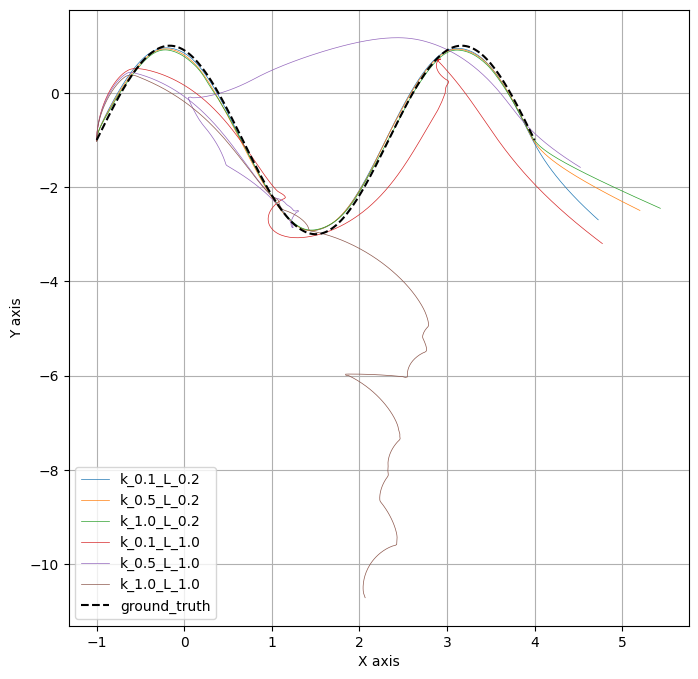

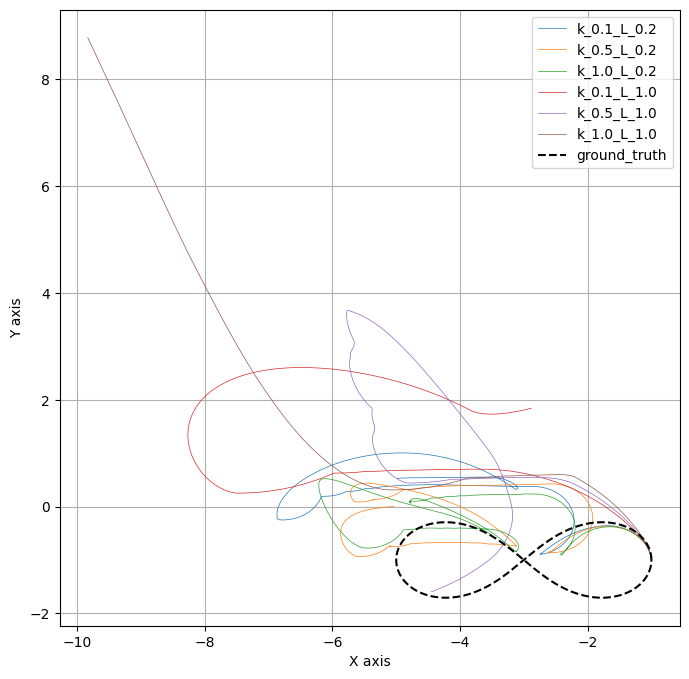

In [63]:
os.makedirs("media", exist_ok=True)
# for trajectory in concat_df["Stanley_traj"].unique():
for trajectory in ["sine", "inf"]:
    fn = "Stanley_{}_trajectories_simple.svg".format(trajectory)
    file_path = os.path.join("media", fn)
    plot_trajectories_given_trajectory(trajectory, file_path)

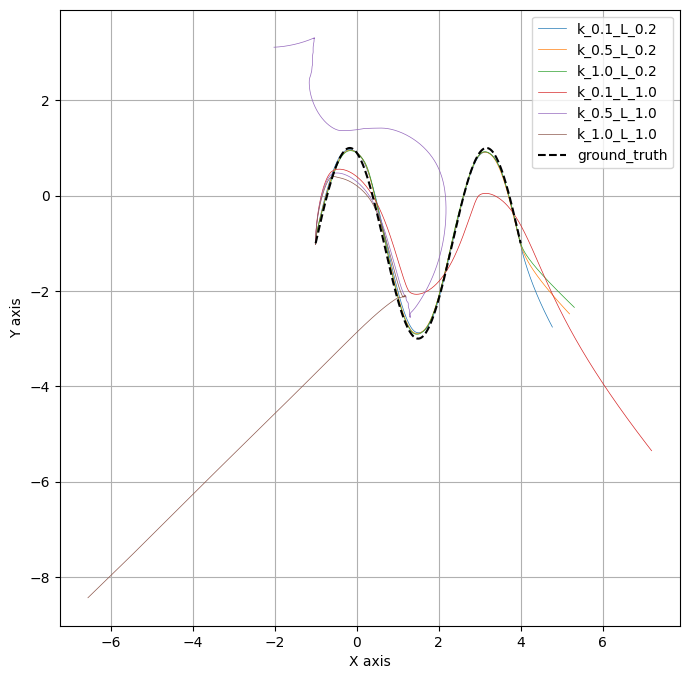

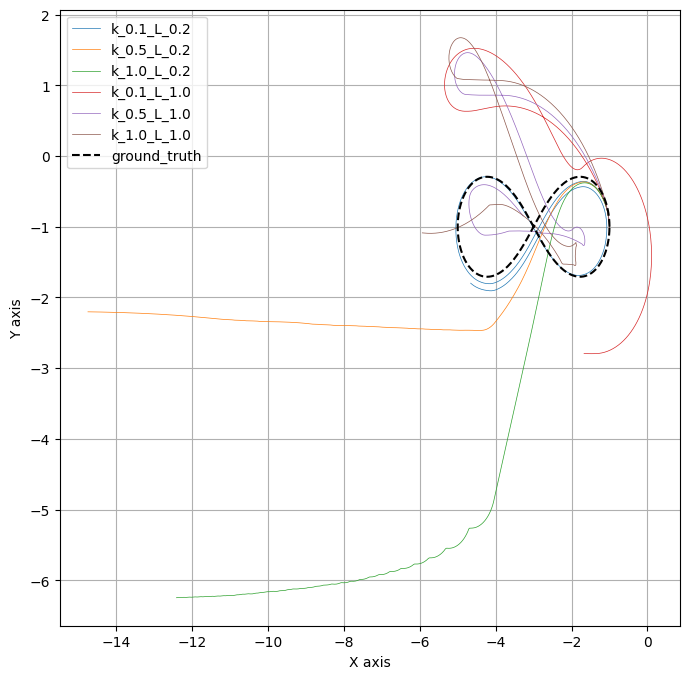

In [64]:
for trajectory in ["sine", "inf"]:
    fn = "Stanley_{}_trajectories_tempo.svg".format(trajectory)
    file_path = os.path.join("media", fn)
    plot_trajectories_given_trajectory(trajectory, file_path, strategy="tempo")

In [59]:
sub_df_1 = concat_df[concat_df["N_kappa"] == chosen_kappa]
pose_list = sub_df_1["state_init"].unique()

inital_angle = np.array([extract_pose_string(p) for p in pose_list])
inital_angles = list(set(inital_angle[:, 2]))

for i_ax, inital_angle in enumerate(inital_angles):
    for pose in pose_list:
        pose_arr = extract_pose_string(pose)
        if pose_arr[2] != inital_angles[i_ax]:
            continue

        sub_df_2 = sub_df_1[sub_df_1["state_init"] == pose]

        reach_goal = sub_df_2.apply(lambda row: np.allclose([row["x [m]"], row["y [m]"]], [0, 0], atol=0.001) \
                                            and np.isclose(row["alpha [rad]"], 0, atol=0.05), axis=1)
        
        if not any(reach_goal):
            print(pose, "cannot reach goal")
        else:
            index = np.flatnonzero(reach_goal)[0]
            print(pose, "reach finishs after", sub_df_2["t [s]"].iloc[index])

sub_df_2

KeyError: 'N_kappa'

<Axes: title={'center': 'runned trajectory'}, xlabel='x [m]'>

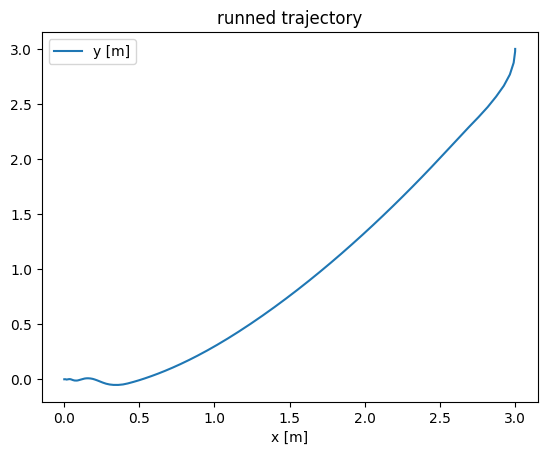

In [ ]:
# df.drop(columns=["t [s]", "stage_obj", "accum_obj"]).plot()

df = df[df["t [s]"] > 0.0005]
df.plot(x="x [m]", y="y [m]", title="runned trajectory")

/tmp/ipykernel_4022/468315634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alpha_nominal"] = df.apply(lambda row:-row["alpha [rad]"] + np.arctan2(-row["y [m]"], -row["x [m]"]), axis=1)
/tmp/ipykernel_4022/468315634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alpha_nominal"] = df["alpha_nominal"].apply(lambda value: 2*np.pi - value if value > np.pi else value)
/tmp/ipykernel_4022/468315634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

<Axes: title={'center': 'runned trajectory'}, xlabel='t [s]'>

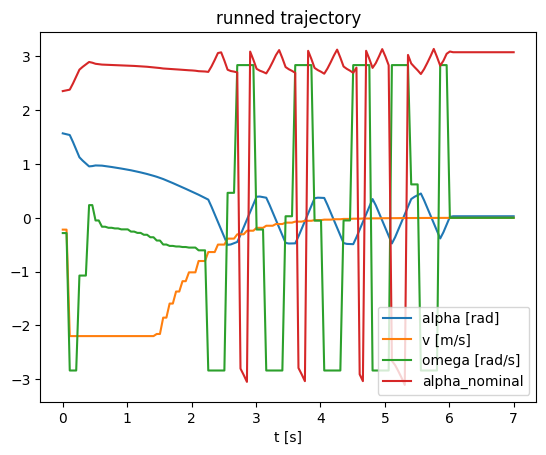

In [ ]:
import numpy as np

df["alpha_nominal"] = df.apply(lambda row:-row["alpha [rad]"] + np.arctan2(-row["y [m]"], -row["x [m]"]), axis=1)
df["alpha_nominal"] = df["alpha_nominal"].apply(lambda value: 2*np.pi - value if value > np.pi else value)
df["alpha_nominal"] = df["alpha_nominal"].apply(lambda value: 2*np.pi + value if value < -np.pi else value)
# df.plot(x="t [s]", y="alpha", title="runned trajectory")
df.plot(x="t [s]", y=["alpha [rad]", "v [m/s]", "omega [rad/s]", "alpha_nominal"], title="runned trajectory")

In [ ]:
k_a = 20
k_b = -0.05

df["beta"] = df.apply(lambda row:-row["alpha [rad]"] - row["alpha_nominal"], axis=1)
df["re-cal-omega"] = df["alpha_nominal"] * k_a + df["beta"] * k_b
print(df.to_markdown())

|     |     t [s] |       x [m] |        y [m] |   alpha [rad] |       run_obj |   accum_obj |     v [m/s] |   omega [rad/s] | parameters                                                                                                                                                                                                                                                                                                                                                                                                                                      | N_kappa    | state_init                         |   alpha_nominal |     beta |   re-cal-omega |
|----:|----------:|------------:|-------------:|--------------:|--------------:|------------:|------------:|----------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/tmp/ipykernel_4022/3454920361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["beta"] = df.apply(lambda row:-row["alpha [rad]"] - row["alpha_nominal"], axis=1)
/tmp/ipykernel_4022/3454920361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["re-cal-omega"] = df["alpha_nominal"] * k_a + df["beta"] * k_b


In [ ]:
df
df.plot(x="t [s]", y=["stage_obj"], title="object")
df.plot(x="t [s]", y=["x [m]", "y [m]"], title="object")

KeyError: "None of [Index(['stage_obj'], dtype='object')] are in the [columns]"

In [ ]:
np.arctan2(-1.995, -1.763), np.arctan2(1.995, 1.763)

In [ ]:
import numpy as np

initial_position = np.array(np.meshgrid([-3, 0, 3], [-3, 0, 3])).T.reshape(-1, 2) 

In [ ]:
initial_position